In [93]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 읽어들이고 출력하기

## 이미지 읽어들이기

In [47]:
#plt.imread
img2=plt.imread("cat2.jpg")

In [48]:
img2.shape

(403, 576, 3)

In [49]:
img2[0][:5] #순서대로 R,G,B

array([[220, 220, 210],
       [220, 222, 209],
       [221, 225, 210],
       [218, 227, 208],
       [214, 226, 206]], dtype=uint8)

In [50]:
#cv2.imread
img=cv2.imread('cat2.jpg')

In [51]:
img.shape

(403, 576, 3)

In [52]:
img[0][:5]

array([[208, 221, 219],
       [208, 223, 219],
       [210, 226, 219],
       [208, 228, 216],
       [204, 226, 214]], dtype=uint8)

- plt.imread : RGB 순서
- cv2.imread : BGR 순서

### plt.imread와 cv2.imread 차이

#### 일반 이미지 처리도구

- 그림판, matplotlib.pyplot
-> R, G, B 순서의 3컬럼으로 값 저장

#### CV2

- B, G, R 순서의 3컬럼으로 값 저장
-> cv2.imread()로 읽어서, plt.imshow()로 출력하면 붉은색 푸른색 바뀜

## 이미지 출력하기

In [53]:
cv2.imshow('sample picture',img)
cv2.waitKey(10000) #cv2를 사용하는 경우에는 별도 출력화면이 실행되기 때문에, 해당화면을 얼마나 유지할 것인가 정해주기
cv2.destroyWindow('sample picture')

In [54]:
type(img)

numpy.ndarray

# 이미지 만들어 저장하기

- 이미지 만드는 것은 [0,255]의 정수로 구성된 3차원 배열을 만드는 작업
- CV2 색상 순서가 BGR로 표현되는것에 주의

## 이미지 만들기

In [55]:
img_size=(512,512,3)
my_img=np.zeros(img_size,dtype='uint8')

In [58]:
for i in range(img_size[0]):
    for j in range(img_size[1]):
        my_img[i][j]=np.array([255,0,0])

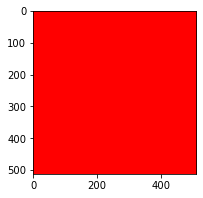

In [59]:
plt.figure(figsize=(4,3))
plt.imshow(my_img)
plt.show()

## 이미지 저장하기

In [34]:
plt.imsave('my_red_img.jpg',my_img)
cv2.imwrite('my_red_cv2.jpg',my_img)

True

# 이미지 조작 명령어들

## 그림의 일부 잘라내기

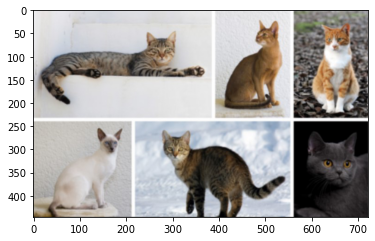

In [27]:
#plt.imread
img3=plt.imread("cats.jpg")
plt.imshow(img3)
plt.show()

In [28]:
img3.shape

(446, 722, 3)

In [29]:
### 그림의 일부 잘라서 subarray만들기

In [30]:
ori_img=img3[img3.shape[0]//2:, :img3.shape[1]//3] #img3.shape의 0은 뭐지?

In [31]:
ori_img.shape

(223, 240, 3)

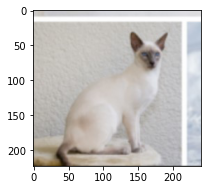

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(ori_img)
plt.show()

## 크기 조정 : .resize()

- 이미지 크기(픽셀 크기)조정
- 대상 이미지의 픽셀 크기 조정

In [33]:
ori_img=cv2.resize(ori_img,(300,300)) #앞 숫자: 너비, 뒷 숫자: 높이

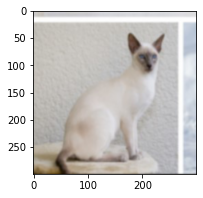

In [34]:
plt.figure(figsize=(3,3))
plt.imshow(ori_img)
plt.show()

## 대칭 : .flip

- 반전(대칭)
- 두번째 인자(flipcode)==0 이면 상하대칭(x축을 기준)
- 두번째 인자(flipcode)>0 이면 좌우대칭(y축을 기준)

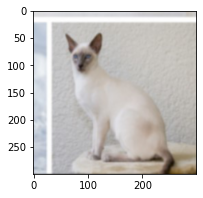

In [35]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.flip(ori_img,1))
plt.show()

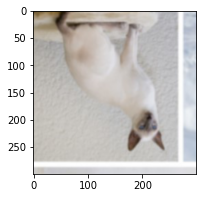

In [36]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.flip(ori_img,0))
plt.show()

## 회전 : warpAffine()

### 회전 위한 매트릭스 생성

- 회전을 위한 매트릭스 생성
- : 회전의 중심점, 회전 각도(시계 반대방향 회전), 배율

In [37]:
mat45=cv2.getRotationMatrix2D(tuple(np.array(ori_img.shape[:2])/2),45,1.0)

### 회전하기

.warpAffine()
- 파라미터 : 회전하고자 하는 이미지, 회전 매트릭스, 회전 후 만들어질 이미지 크기

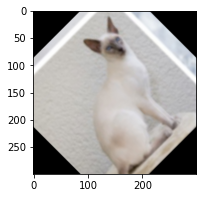

In [41]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.warpAffine(ori_img,mat45,ori_img.shape[:2]))
plt.show()

## 색조 변환 : .cvtColor()

- RGB를 다른 색 공간으로 변환

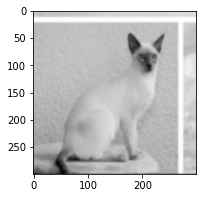

In [66]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(ori_img,cv2.COLOR_RGB2GRAY),cmap='gray')
plt.show()

## 반전 : .bitwise_not()

- 이미지를 나타내는 배열의 색상 값을 프로그램으로 직접 바꾸어 줘도됨

### bitwise_not 함수사용

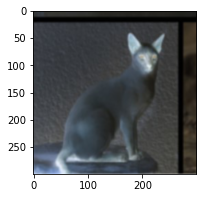

In [61]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.bitwise_not(ori_img))
plt.show()

### 배열로 처리

In [87]:
img_sizes=ori_img.shape[:3]

In [88]:
m_img=np.zeros(img_sizes,dtype='uint8')

In [77]:
ori_img.shape[:]

(300, 300, 3)

In [91]:
for i in range(img_sizes[0]):
    for j in range(img_sizes[1]):
        for k in range(3):
            m_img[i][j][k]=255-ori_img[i][j][k]

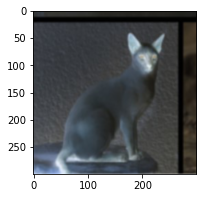

In [92]:
plt.figure(figsize=(3,3))
plt.imshow(m_img)
plt.show()

## 이미지 합성

### 이미지 합치기 : cv2.add(), cv2.addWeighted()

In [79]:
my_red=plt.imread('my_red_img.jpg')

In [81]:
my_red.shape

(512, 512, 3)

In [82]:
ori_img.shape

(300, 300, 3)

In [84]:
my_red_300=cv2.resize(my_red,(300,300)) #고양이 사진과 같은 크기로 변경하기

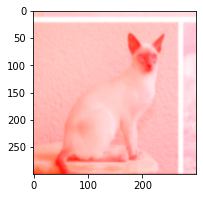

In [85]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.add(ori_img,my_red_300))
plt.show()

### 이미지 빼기 : cv2.substract()

## 임계값 처리 : .THRESH_TOZERO

### .THRESH_TOZERO

- 임계값 이하로 어두운 값은 같은 값(0)으로 처리

In [101]:
_, my_img=cv2.threshold(ori_img,125,255,cv2.THRESH_TOZERO)

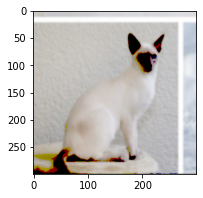

In [102]:
plt.figure(figsize=(3,3))
plt.imshow(my_img)
plt.show()

### .THRESH_BINARY

- 임계값 이하로 어두운 값은 같은 값(이진 값)으로 처리

In [103]:
_, my_img=cv2.threshold(ori_img,125,255,cv2.THRESH_BINARY_INV)

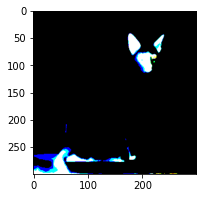

In [104]:
plt.figure(figsize=(3,3))
plt.imshow(my_img)
plt.show()d

## 필터

### 흐림 : Gaussian Blur

- 특정 픽셀 주위에[N*N]의 마스크(필터)를 적용해서 해당 영역 픽셀값들의 평균을 개별 픽셀에 적용
-> 주변 값들의 평균이 적용되기 때문에 평균적인 색상으로 바뀌어 흐리게 보임(영역이 넓어질수록 효과UP)

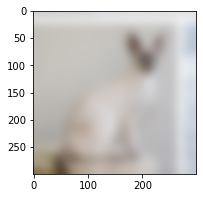

In [111]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.GaussianBlur(ori_img,(97,97),9))
plt.show()

### 팽창 : dilate

- 특정 픽셀 주위에 [3*3]의 마스크(필터)를 적용해서 '해당 영역의 최고 값'을 개별 픽셀에 적용
-> "최고 값"이 적용되기 때문에 색상이 밝게 보임

In [108]:
filter1=np.array([[1,1,1],
                 [1,0,1], #특정 픽셀 주위에 적용하는 거라서
                 [1,1,1]],dtype='uint8')

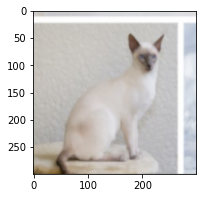

In [109]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.dilate(ori_img,filter1))
plt.show()

### 침식 : cv2.erode

- 특정 픽셀 주위에 [3*3]의 마스크(필터)를 적용해서 해당 영역 픽셀 값의 "최소값"을 개별 픽셀에 적용
-> 최소 값이 적용되기 때문에 색상 어둡게 보임

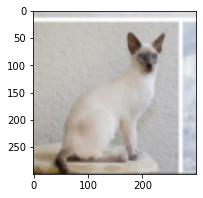

In [111]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.erode(ori_img,filter1))
plt.show()

# 경계면 추출

- 색상 변화의 미분값을 사용해서 "변하는 지점" 추출
-> The Image Gradient Theory
-> 딥러닝 CNN모형의 이론적 바탕

- 경계면 추출 위해 필터(filter, kernel)적용

## 경계면 추출 예제

### 사용필터1: Sobel

- X축으로 이동하면서 색깔의 변화면 찾음(따로따로)
-> 수직선 경계면, 사선 경계면
- Y축으로 이동하면서 색깔의 변화면 찾음(따로따로)
-> 수평선 경계면, 사선 경계면

- 자연수 변화율을 측정할 경우, 경계면의 일부가 나타나지 않는 것 볼 수 있음
-> 검은색 >  흰색 변화 : 나타남 (양의 변화)
-> 흰색 > 검은색 변화 : 나타나지 않음 (음의 변화)

==> 양의변화만 나타나고, 음의 변화는 나타나지 않기 때문 & CV_8U는 색의 변화율을 자연수로 표시(+만 나타낼수있음) & 음의 변화율 0으로 바뀜

In [112]:
sobelx=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
sobelxy=cv2.Sobel(img,cv2.CV_8U,1,1,ksize=5)

### 사용필터2: Laplacian

- X축과 Y축을 같이 이동하면서 색깔의 변화면을 찾음(동시)
-> 수직선 경계면, 수평선 경계면, 사선 경계면

In [113]:
laplacian=cv2.Laplacian(img,cv2.CV_8U)

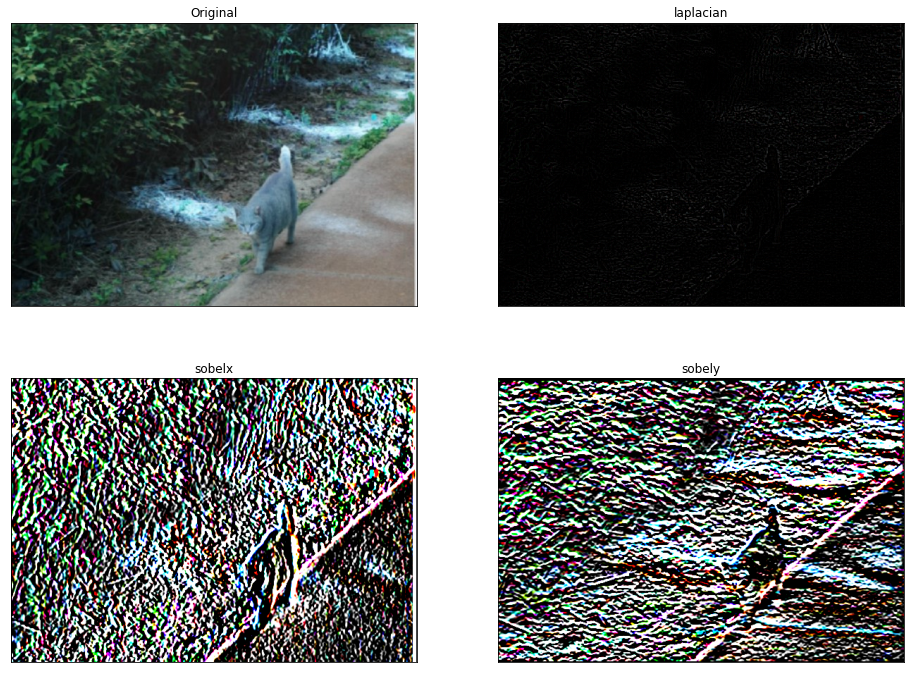

In [116]:
fig=plt.figure(figsize=(16,12))

ax_0=fig.add_subplot(2,2,1)
ax_0.imshow(img,cmap='viridis')
ax_0.set_title('Original')
ax_0.set_xticks([])
ax_0.set_yticks([])

ax_L=fig.add_subplot(2,2,2)
ax_L.imshow(laplacian,cmap='gray')
ax_L.set_title('laplacian')
ax_L.set_xticks([])
ax_L.set_yticks([])

ax_Sx=fig.add_subplot(2,2,3)
ax_Sx.imshow(sobelx,cmap='gray')
ax_Sx.set_title('sobelx')
ax_Sx.set_xticks([])
ax_Sx.set_yticks([])

ax_Sy=fig.add_subplot(2,2,4)
ax_Sy.imshow(sobely,cmap='gray')
ax_Sy.set_title('sobely')
ax_Sy.set_xticks([])
ax_Sy.set_yticks([])

plt.show()

### 사용필터 3 : CV_64F

In [121]:
laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=5)

In [122]:
laplacian=np.uint8(np.absolute(laplacian))
sobelx=np.uint8(np.absolute(sobelx))
sobely=np.uint8(np.absolute(sobely))

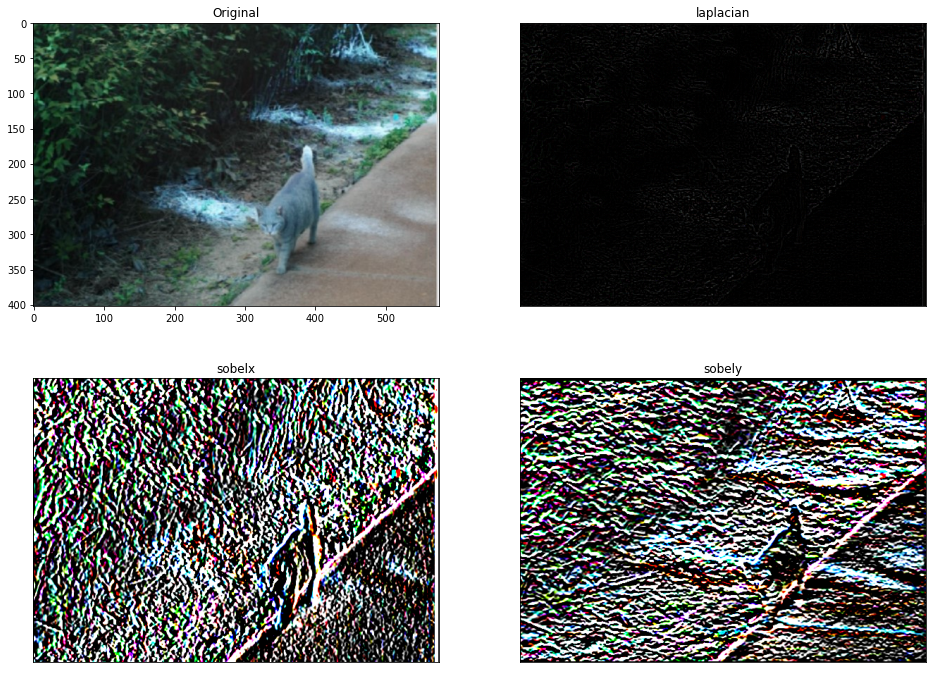

In [117]:
fig=plt.figure(figsize=(16,12))

ax_0=fig.add_subplot(2,2,1)
ax_0.imshow(img,cmap='gray')
ax_0.set_title('Original')


ax_L=fig.add_subplot(2,2,2)
ax_L.imshow(laplacian,cmap='gray')
ax_L.set_title('laplacian')
ax_L.set_xticks([])
ax_L.set_yticks([])

ax_Sx=fig.add_subplot(2,2,3)
ax_Sx.imshow(sobelx,cmap='gray')
ax_Sx.set_title('sobelx')
ax_Sx.set_xticks([])
ax_Sx.set_yticks([])

ax_Sy=fig.add_subplot(2,2,4)
ax_Sy.imshow(sobely,cmap='gray')
ax_Sy.set_title('sobely')
ax_Sy.set_xticks([])
ax_Sy.set_yticks([])

plt.show()

# 배열 연산 복습

In [87]:
A=np.arange(20).reshape(4,5)

In [88]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [96]:
A[2][3] #2행 3열

13

In [90]:
A[2,3] #2행 3열-위치만 알려줌

13

In [91]:
A[:2,:3] #슬라이싱 통해 범위지정(슬라이싱은 원래 마지막 범위부분 제외)

array([[0, 1, 2],
       [5, 6, 7]])

In [93]:
A[:2][:3,:3]

array([[0, 1, 2],
       [5, 6, 7]])